In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("Data/BTC-USD.csv")
print(dataset.shape)
dataset.head()

(1827, 7)


Date        Open        High         Low       Close   Adj Close  \
0  2016-12-21  800.643982  834.281006  799.405029  834.281006  834.281006   
1  2016-12-22  834.179993  875.781982  834.148987  864.539978  864.539978   
2  2016-12-23  864.888000  925.117004  864.677002  921.984009  921.984009   
3  2016-12-24  922.179993  923.479004  886.335022  898.822021  898.822021   
4  2016-12-25  899.651978  899.651978  862.424011  896.182983  896.182983   

      Volume  
0  155576000  
1  200027008  
2  275564000  
3  137727008  
4  143664992

In [3]:
dataset["Date"]=pd.to_datetime(dataset['Date'])
dataset['Year'] = dataset['Date'].dt.year
dataset

Date          Open          High           Low         Close  \
0    2016-12-21    800.643982    834.281006    799.405029    834.281006   
1    2016-12-22    834.179993    875.781982    834.148987    864.539978   
2    2016-12-23    864.888000    925.117004    864.677002    921.984009   
3    2016-12-24    922.179993    923.479004    886.335022    898.822021   
4    2016-12-25    899.651978    899.651978    862.424011    896.182983   
...         ...           ...           ...           ...           ...   
1822 2021-12-17  47653.730469  48004.894531  45618.214844  46202.144531   
1823 2021-12-18  46219.253906  47313.828125  45598.441406  46848.777344   
1824 2021-12-19  46853.867188  48089.664063  46502.953125  46707.015625   
1825 2021-12-20  46707.062500  47401.718750  45579.808594  46880.277344   
1826 2021-12-21  46985.242188  48912.152344  46739.777344  48565.843750   

         Adj Close       Volume  Year  
0       834.281006    155576000  2016  
1       864.539978    200027008  2016  
2       921.984009    275564000  2016  
3       898.822021    137727008  2016  
4       896.182983    143664992  2016  
...            ...          ...   ...  
1822  46202.144531  32902725329  2021  
1823  46848.777344  26098292690  2021  
1824  46707.015625  25154053861  2021  
1825  46880.277344  30961902129  2021  
1826  48565.843750  30736644096  2021  

[1827 rows x 8 columns]

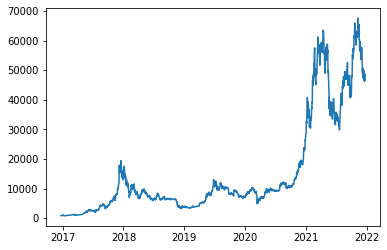

In [4]:
plt.plot(dataset['Date'],dataset['Close'])

In [5]:
df = dataset[['Close']].copy()

In [6]:
df.describe()

Close
count   1827.000000
mean   15231.832471
std    16838.811505
min      777.757019
25%     5319.541504
50%     8595.740234
75%    13548.505860
max    67566.828125

### Split Data

In [7]:
to_row = int(len(df)*0.9)
training_data = list(df[0:to_row]['Close'])
testing_data = list(df[to_row:]['Close'])

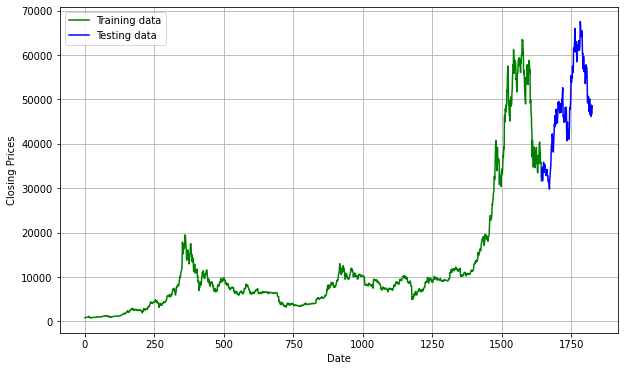

In [8]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Closing Prices")
plt.plot(df[0:to_row]['Close'],'green',label="Training data")
plt.plot(df[to_row:]['Close'],'blue',label="Testing data")
plt.legend()

### ARIMA

In [9]:
len(testing_data)

183

In [10]:
model_predictions=[]
n_test_observ = len(testing_data)

In [11]:
for i in range (n_test_observ):
    model = ARIMA(training_data,order=(4,2,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output
    model_predictions.append(yhat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)


In [12]:
yhat

array([46820.11471805])

In [13]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1826
Model:                 ARIMA(4, 2, 1)   Log Likelihood              -15018.246
Date:                Tue, 28 Dec 2021   AIC                          30048.492
Time:                        22:11:09   BIC                          30081.545
Sample:                             0   HQIC                         30060.685
                               - 1826                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0354      0.013     -2.648      0.008      -0.062      -0.009
ar.L2          0.0003      0.013      0.022      0.983      -0.024       0.025
ar.L3          0.0059      0.013      0.436      0.6

In [14]:
len(testing_data)

183

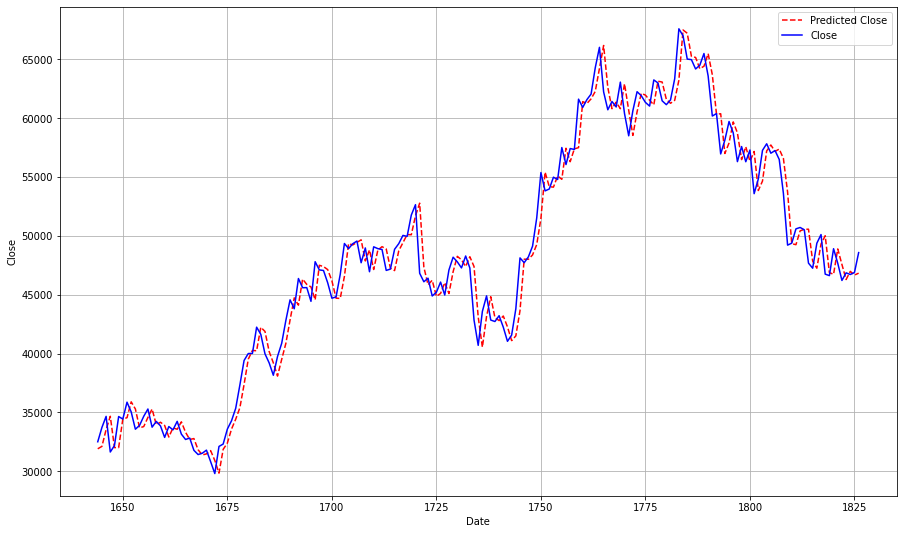

In [15]:
plt.figure(figsize=(15,9))
plt.grid(True)

data_range = df[to_row:].index

plt.plot(data_range,model_predictions,color = 'red', linestyle = 'dashed',label='Predicted Close')
plt.plot(data_range,testing_data,color = 'blue',label='Close')

plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()

In [16]:
mape = np.mean(np.abs(np.array(model_predictions)- np.array(testing_data))/np.abs(testing_data))
print('MAPE: ' + str(mape))

MAPE: 0.24988660972839724


24% MAPE implies 76% accuracy

In [18]:
for i in range (n_test_observ):
    model2 = ARIMA(training_data,order=(4,2,2))
    model_fit = model2.fit()
    output = model_fit.forecast()
    yhat2 = output
    model_predictions.append(yhat2)
    actual_test_value2 = testing_data[i]
    training_data.append(actual_test_value2)


In [19]:
yhat2

array([46822.80920607])

In [20]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2009
Model:                 ARIMA(4, 2, 2)   Log Likelihood              -16838.556
Date:                Tue, 28 Dec 2021   AIC                          33691.112
Time:                        22:18:47   BIC                          33730.343
Sample:                             0   HQIC                         33705.515
                               - 2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4205      0.184      2.285      0.022       0.060       0.781
ar.L2         -0.0237      0.017     -1.365      0.172      -0.058       0.010
ar.L3          0.0359      0.018      2.045      0.0

In [21]:
len(model_predictions)

366

In [22]:
len(testing_data)

183

In [23]:
len(training_data)

2010

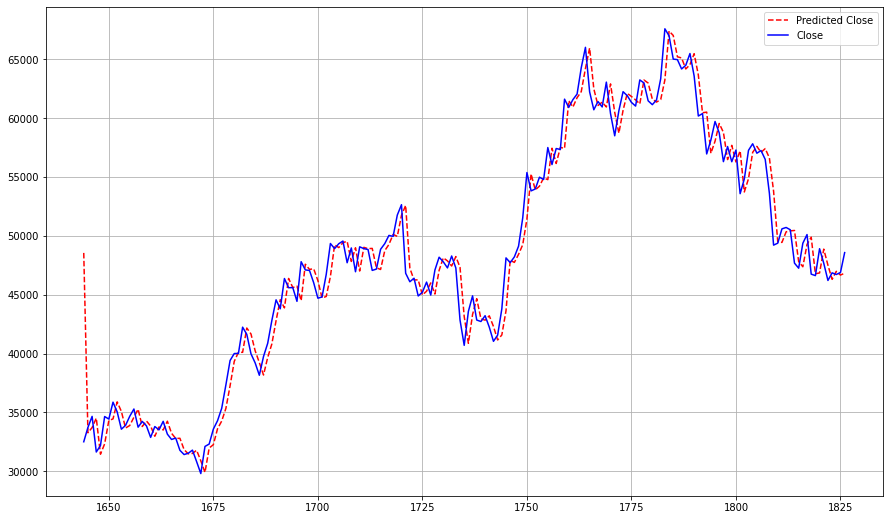

In [24]:
plt.figure(figsize=(15,9))
plt.grid(True)

data_range = df[to_row:].index

plt.plot(data_range,model_predictions[183:],color = 'red', linestyle = 'dashed',label='Predicted Close')
plt.plot(data_range,testing_data,color = 'blue',label='Close')


plt.legend()
plt.show()

In [25]:
mape = np.mean(np.abs(np.array(model_predictions)- np.array(testing_data))/np.abs(testing_data))
print('MAPE: ' + str(mape))

MAPE: 0.24946145401461906
